In [2]:
import os
import json

import numpy as np

In [3]:
data_path = "../../data/results/two-shot/5x5-relation/"

data = []
for parent_folder in os.listdir(f"./{data_path}"):
    for child_folder in os.listdir(f"./{data_path}/{parent_folder}"):
        for file_name in os.listdir(f"./{data_path}/{parent_folder}/{child_folder}"):
            filepath = os.path.join(f"./{data_path}/{parent_folder}/{child_folder}", file_name)
            with open(filepath, "r") as file:
                json_data = json.load(file)
                data.append(json_data)

f1_scores_1 = [d["metrics"]["overall_metrics"]["f1_score"] for d in data]
f1_scores_1 = [d["metrics"]["entity_metrics"]["overall"]["f1_score"] for d in data]
f1_scores_relation_1 = [d["metrics"]["relation_metrics"]["overall"]["f1_score"] for d in data]

In [4]:
data_path = "../../data/results/two-shot/5x5-relation-with-errors/"

data = []
for parent_folder in os.listdir(f"./{data_path}"):
    for child_folder in os.listdir(f"./{data_path}/{parent_folder}"):
        for file_name in os.listdir(f"./{data_path}/{parent_folder}/{child_folder}"):
            filepath = os.path.join(f"./{data_path}/{parent_folder}/{child_folder}", file_name)
            with open(filepath, "r") as file:
                json_data = json.load(file)
                data.append(json_data)

f1_scores_2 = [d["metrics"]["overall_metrics"]["f1_score"] for d in data]
f1_scores_2 = [d["metrics"]["entity_metrics"]["overall"]["f1_score"] for d in data]
f1_scores_relation_2 = [d["metrics"]["relation_metrics"]["overall"]["f1_score"] for d in data]

In [5]:
print(np.mean(f1_scores_1), np.mean(f1_scores_2))

0.2189777777777778 0.18515555555555555


In [9]:
from scipy import stats

stats.ttest_rel(f1_scores_2, f1_scores_1, alternative="less")

TtestResult(statistic=-3.2347821690518592, pvalue=0.0007006612703542351, df=224)

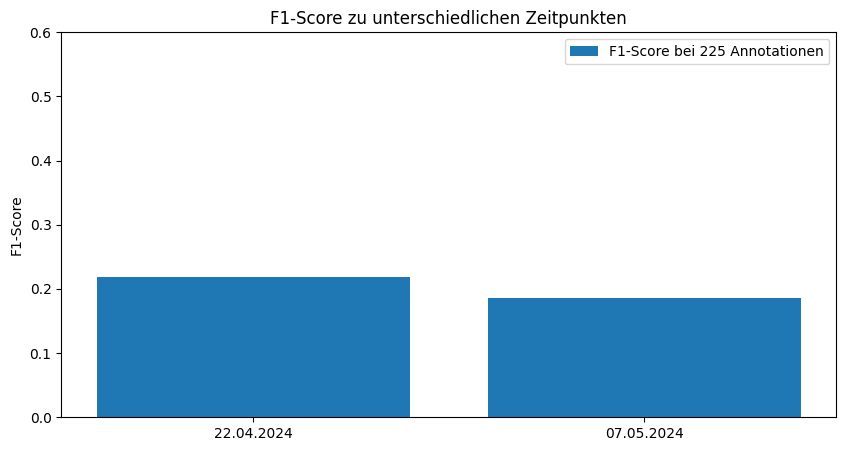

In [10]:
import matplotlib.pyplot as plt

values = [np.mean(np.mean(f1_scores_1)), np.mean(np.mean(f1_scores_2))]

plt.figure(figsize=(10, 5))

plt.bar(["22.04.2024", "07.05.2024"], values, label='F1-Score bei 225 Annotationen')

plt.ylabel('F1-Score')
plt.title('Ø F1-Score zu unterschiedlichen Zeitpunkten')

plt.legend()

plt.ylim((0, 0.6))

plt.savefig("./images/time_vergleich.png", dpi=700)

plt.show()